## Import libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Raw Data

In [2]:
df = pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/DA projects/BlankIT Grocery/blankit_csv.csv")

## Sample Data

In [3]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
0,rg,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5
1,lf,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5
2,rg,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5
3,rg,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5
4,lf,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5
5,lf,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5
6,lf,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5
7,lf,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5
8,lf,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5
9,lf,NCU41,Health and Hygiene,2017,OUT035,Tier 2,Small,Supermarket Type1,0.052045,18.85,192.1846,5


## Data Size

In [4]:
print("Size of Data: ", df.shape)

Size of Data:  (7060, 12)


## Field info

In [5]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Total Sales', 'Rating'],
      dtype='object')

## Data Types

In [6]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Total Sales                  float64
Rating                         int64
dtype: object

## Data Cleaning

In [7]:
print(df['Item Fat Content'].unique())

['rg' 'lf' 'low fat' 'regular' 'Low Fat']


In [8]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'lf': 'Low Fat',
                                                         'low fat': 'Low Fat',
                                                         'rg': 'Regular',
                                                        'regular': 'Regular'})

In [9]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


## KPI's requirements

In [27]:
# Total Sales
total_sales = df['Total Sales'].sum()

# Average Sales
avg_sales = df['Total Sales'].mean()

# Number of Items Sold
no_of_items = df['Total Sales'].count()

# Average Rating
avg_rating  = df['Rating'].mean()

# Display
print(f"Total Sales: ${total_sales:,.1f}")

print(f"Avg Sales:   ${avg_sales:,.1f}")

print(f"No of Items: {no_of_items:,}")

print(f"Avg Rating:  {avg_rating:,.1f}")

Total Sales: $997,159.2
Avg Sales:   $141.2
No of Items: 7,060
Avg Rating:  4.0


## Charts requirements

#### Total Sale by Fat Content

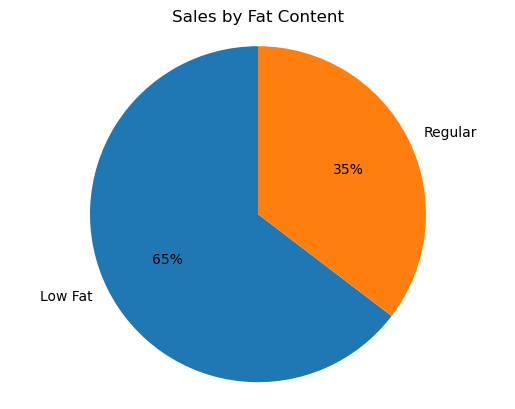

In [11]:
sales_by_fat = df.groupby('Item Fat Content')["Total Sales"].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index,
        autopct = '%.0f%%',
        startangle = 90)

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

#### Total Sale by Item Type

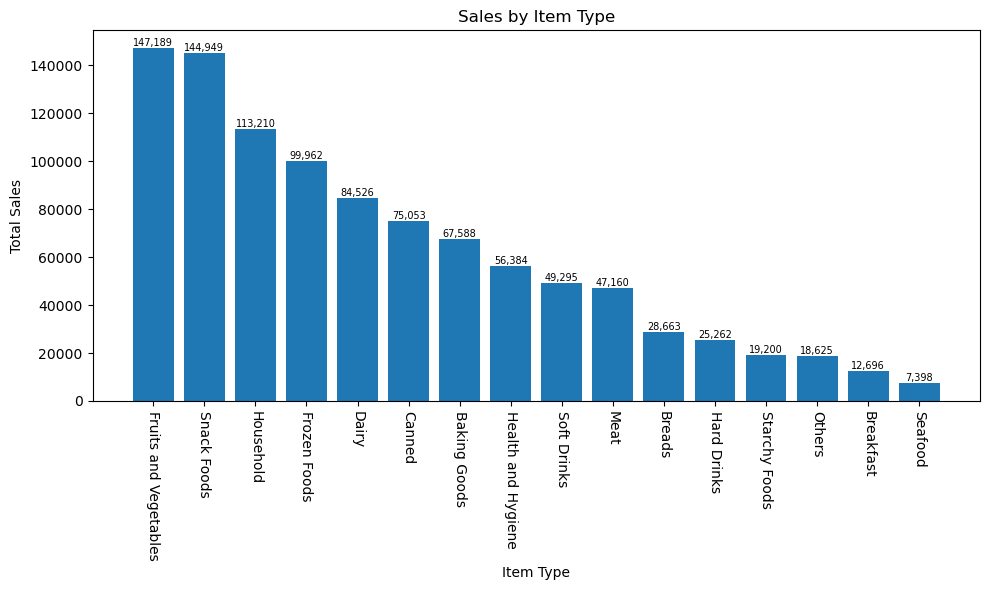

In [12]:
sales_by_type = df.groupby('Item Type')['Total Sales'].sum().sort_values(ascending = False)

plt.figure(figsize=(10,6))

bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation = -90)
plt .xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title ('Sales by Item Type')      

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():,.0f}', ha = 'center', va = 'bottom', fontsize = 7)
    
plt.tight_layout()
plt.show()

#### Fat Content by Outlet for Total Sales

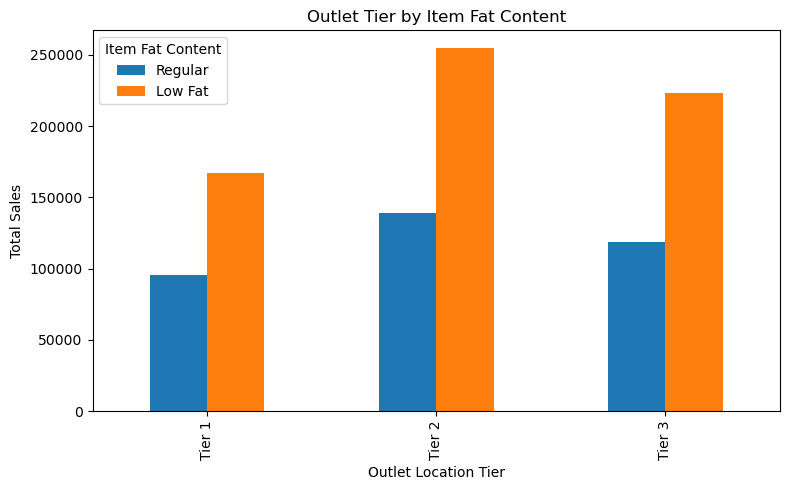

In [13]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Total Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot(kind = 'bar', figsize = (8,5), title = 'Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title = 'Item Fat Content')

plt.tight_layout()
plt.show()

 


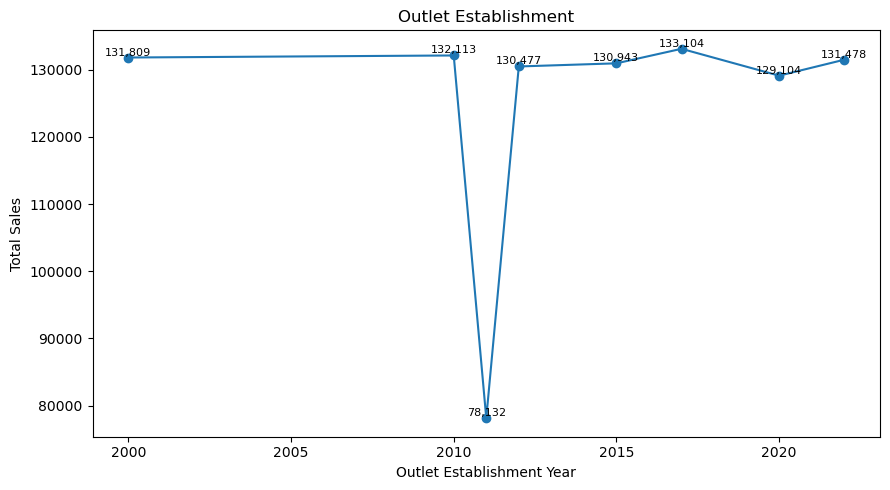

In [19]:
sales_by_year = df.groupby('Outlet Establishment Year')['Total Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


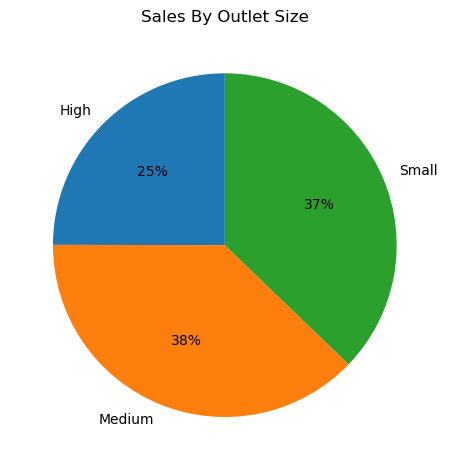

In [26]:
sales_by_size = df.groupby('Outlet Size')['Total Sales'].sum()

plt.pie(sales_by_size, labels = sales_by_size.index,
        startangle = 90,
        autopct = '%.0f%%')
plt.title('Sales By Outlet Size')

plt.tight_layout()
plt.show()


#### Sales by Location

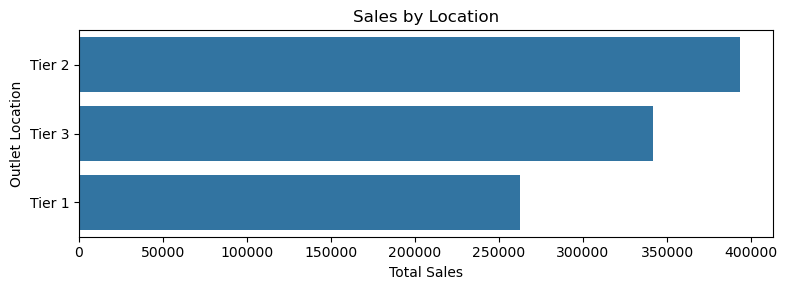

In [32]:
sales_by_location = df.groupby('Outlet Location Type')['Total Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Total Sales', ascending = False)

plt.figure(figsize = (8,3))
sns.barplot(x = 'Total Sales', y = 'Outlet Location Type', data = sales_by_location)

plt.title('Sales by Location')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location')

plt.tight_layout()
plt.show()